In [1]:
import os, glob
import os.path
import shutil

from astropy.io import fits

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm

from astropy.wcs import WCS

from tqdm import tqdm_notebook as tqdm

from gausspyplus.plotting import get_points_for_colormap, shiftedColorMap

def get_cmap_rchi2(vmin, vmax):
    orig_cmap = matplotlib.cm.RdBu_r
    start, stop = get_points_for_colormap(vmin, vmax, central_val=1.)
    midpoint = (1 - vmin) / (vmax - vmin)
    return shiftedColorMap(orig_cmap, start=0., midpoint=midpoint, stop=stop)

import numpy as np
# import cmocean
# import cmocean.cm as cmo

def add_style(ax):
    ax.set_xlabel('Galactic Longitude')
    ax.set_ylabel('Galactic Latitude')
    ax.invert_yaxis()
    
from gausspyplus.utils import spectral_cube_functions

if not os.path.exists('decomposition_grs'):
    !mkdir decomposition_grs

In [2]:
def make_velocity_axis(h):
    array = (np.arange(h["NAXIS3"]) - h["CRPIX3"] +1) * h["CDELT3"] + h["CRVAL3"]
    return array/1000.

In [3]:
filenames = glob.glob("decomposition/gpy_prepared/smc_HI_cube_askap_sub_*.pickle")
fileprefs = [f.split("gpy_prepared/")[1] for f in filenames]
donenames = glob.glob(
    "decomposition/gpy_decomposed/smc_HI_cube_askap_sub_*_g+_fit_fin.pickle"
)
doneprefs = [f.split("gpy_decomposed/")[1] for f in donenames]
doneprefs = [f.split("_g+_fit")[0] for f in doneprefs]
doneprefs = [f + ".pickle" for f in doneprefs]

filenames = ["decomposition/gpy_prepared/" + f for f in doneprefs]

print(filenames)

['decomposition/gpy_prepared/smc_HI_cube_askap_sub_60.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_1.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_48.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_61.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_58.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_34.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_49.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_31.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_15.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_13.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_36.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_51.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_7.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_56.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_39.pickle', 'decomposition/gpy_prepared/smc_HI_cube_askap_sub_62.pickle', 'decompos

In [ ]:
fig = plt.figure(0,[16,12])

for i, filename in enumerate(filenames):
    
    filestr = filename.split(".pickle")[0]
#     print(filestr)
    filestr = filestr.split("sub_")[1]
#     print(filestr)
    ax = fig.add_subplot(8,8,i+1)
    
    comp_file = 'decomposition/gpy_maps/smc_HI_cube_askap_sub_'+filestr+'_g+_component_map.fits'
    comp_map = fits.getdata(comp_file)
    
    im = ax.imshow(comp_map, origin='lower')
    ax.set_title(filestr)
    
    plt.colorbar(im)
    
plt.tight_layout()

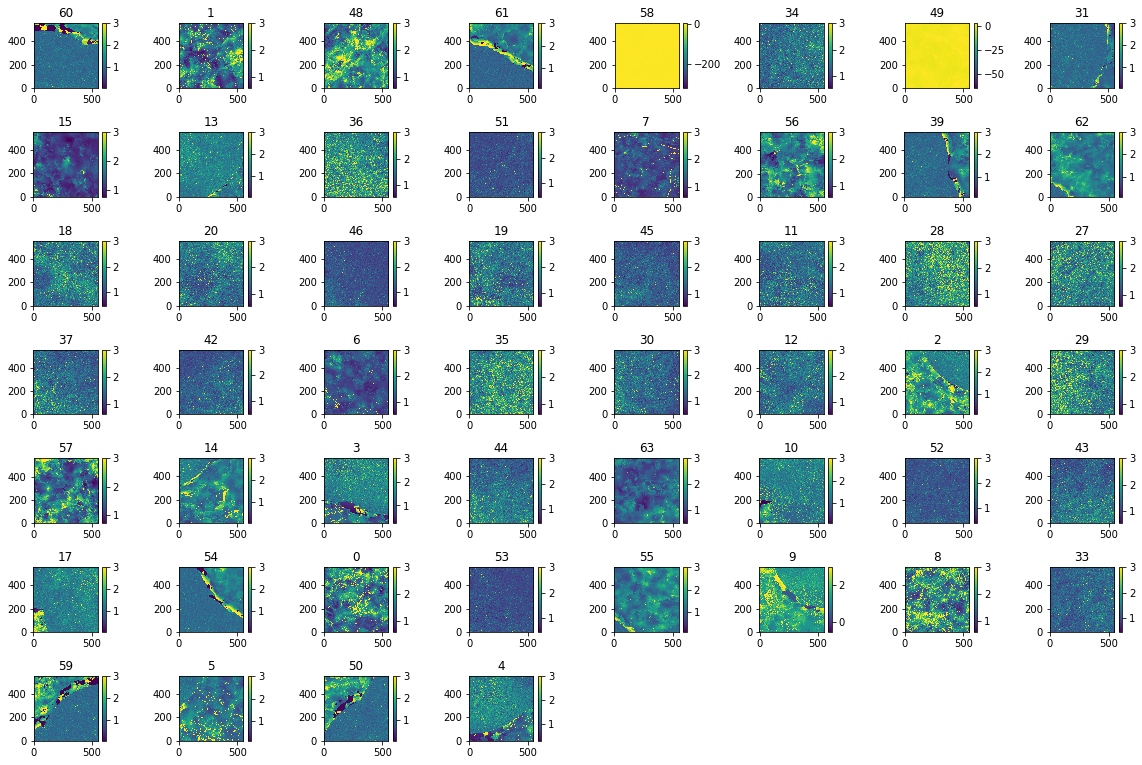

In [5]:
fig = plt.figure(0,[16,12])

for i, filename in enumerate(filenames):
    filestr = filename.split(".pickle")[0]
    filestr = filestr.split("sub_")[1]
  
    ax = fig.add_subplot(8,8,i+1)
    
    comp_file = 'decomposition/gpy_maps/smc_HI_cube_askap_sub_'+filestr+'_g+_rchi2_map.fits'
    comp_map = fits.getdata(comp_file)
    
    im = ax.imshow(comp_map, origin='lower', vmax=3)
    ax.set_title(filestr)
    
    plt.colorbar(im)
    
plt.tight_layout()

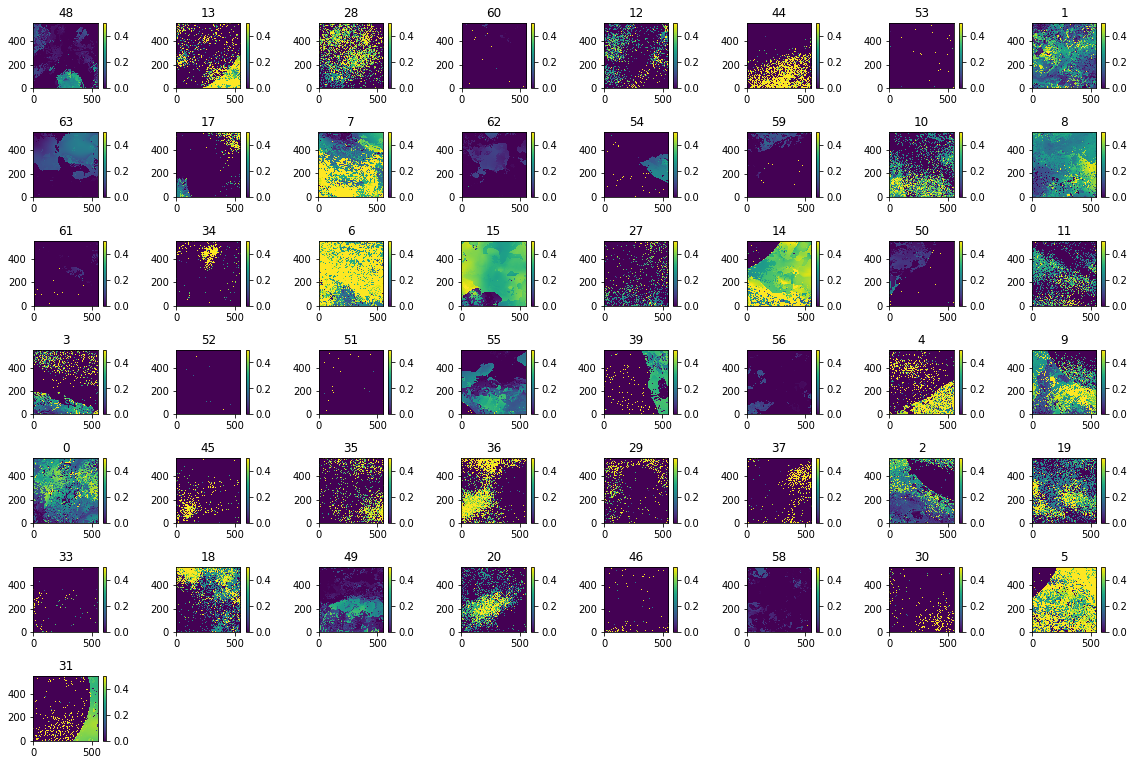

In [6]:
fig = plt.figure(0,[16,12])

filenames = glob.glob("decomposition/gpy_maps/smc_HI_cube_askap_sub_*_g+_fit_fin_CNM_map_7_MW.fits")
# print(filenames)

for i, comp_file in enumerate(filenames):
    filestr = comp_file.split("_g+")[0]
    filestr = filestr.split("sub_")[1]
    
    ax = fig.add_subplot(8,8,i+1)
    
    comp_map = fits.getdata(comp_file)
    
    im = ax.imshow(comp_map, origin='lower', vmin=0, vmax=0.5) #, vmax=3)
    ax.set_title(filestr)
    
    plt.colorbar(im)
    
plt.tight_layout()

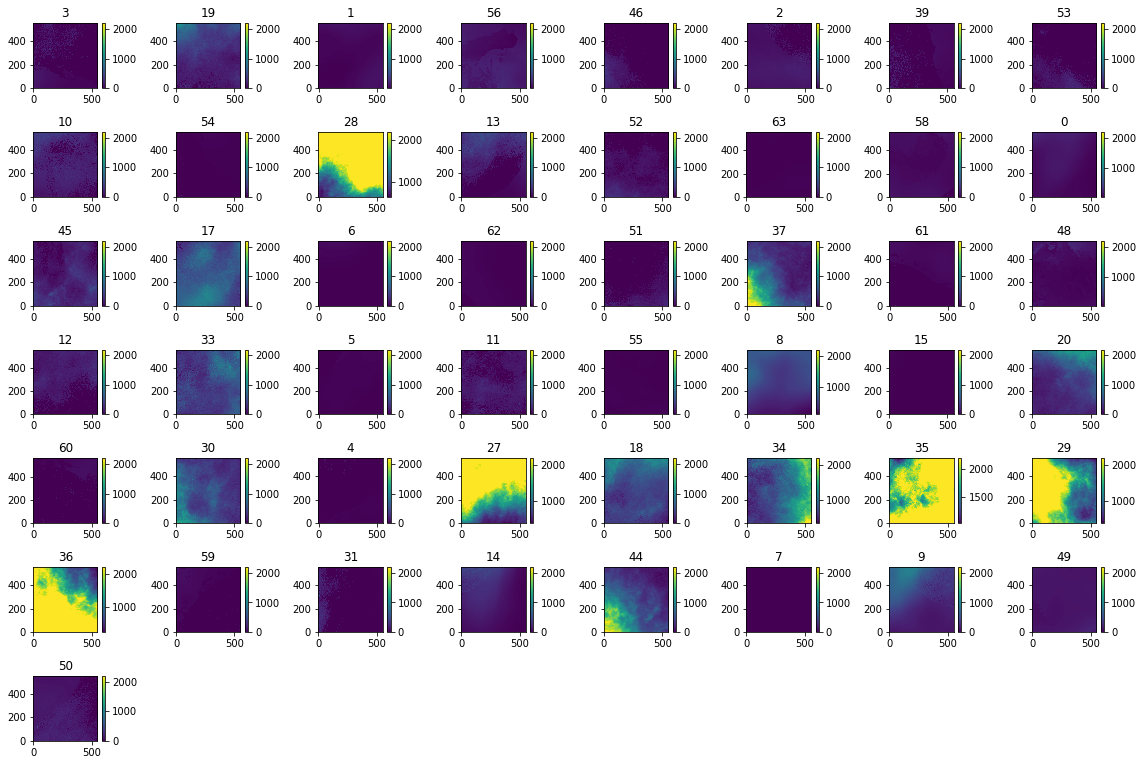

In [7]:
fig = plt.figure(0,[16,12])

filenames = glob.glob("decomposition/gpy_maps/smc_HI_cube_askap_sub_*_g+_fit_fin_NHI_map_SMC.fits")
# print(filenames)

for i, comp_file in enumerate(filenames):
    filestr = comp_file.split("_g+")[0]
    filestr = filestr.split("sub_")[1]
    
    ax = fig.add_subplot(8,8,i+1)
    
    comp_map = fits.getdata(comp_file)
    
    im = ax.imshow(comp_map, origin='lower', vmax=2200)#, vmin=0, vmax=0.5) #, vmax=3)
    ax.set_title(filestr)
    
    plt.colorbar(im)
    
plt.tight_layout()

In [9]:
# Make dummy N(HI) maps for all sub_cubes
filenames = glob.glob('sub_cubes/smc_HI_cube_askap_sub*.fits')

for filename in tqdm(filenames):
    cube, header = fits.getdata(filename, header=True)
    
    vels = make_velocity_axis(header)
    smc_spots = np.argwhere((vels > 80.) & (vels < 220)).ravel()
    mw_spots = np.argwhere((vels > -100.) & (vels < 80)).ravel()

    header2 = header.copy()
    del header2['NAXIS3']
    del header2['CDELT3']
    del header2['CRPIX3']
    del header2['CRVAL3']
    header2['NAXIS'] = 2
    header2['WCSAXES'] = 2

    nhimap = np.nansum(cube, axis=0)
    
    nhimap_smc = np.nansum(cube[smc_spots,:,:], axis=0) * np.abs(vels[1]-vels[0])
    nhimap_mw = np.nansum(cube[mw_spots,:,:], axis=0) * np.abs(vels[1]-vels[0])
    
    fits.writeto(filename.replace('.fits', '_nhimap.fits'), nhimap, header2, overwrite=True)
    fits.writeto(filename.replace('.fits', '_nhimap_smc.fits'), nhimap_smc, header2, overwrite=True)
    fits.writeto(filename.replace('.fits', '_nhimap_mw.fits'), nhimap_mw, header2, overwrite=True)


In [8]:
# components = glob.glob('sub_cubes/smc_HI_cube_askap_sub*_nhimap.fits')
components = [
    'sub_cubes/smc_HI_cube_askap_sub_'+str(i)+'_nhimap.fits'
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="sub_cubes/smc_HI_cube_askap_NHI_all.fits",
    save=True,
)

components = [
    'sub_cubes/smc_HI_cube_askap_sub_'+str(i)+'_nhimap_mw.fits'
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="sub_cubes/smc_HI_cube_askap_NHI_MW.fits",
    save=True,
)

components = [
    'sub_cubes/smc_HI_cube_askap_sub_'+str(i)+'_nhimap_smc.fits'
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="sub_cubes/smc_HI_cube_askap_NHI_SMC.fits",
    save=True,
)

SAVED FILE: 'smc_HI_cube_askap_NHI_all.fits' in 'sub_cubes'
SAVED FILE: 'smc_HI_cube_askap_NHI_MW.fits' in 'sub_cubes'
SAVED FILE: 'smc_HI_cube_askap_NHI_SMC.fits' in 'sub_cubes'


In [45]:
def make_dummy_maps(mapstr):
    for i in range(64):
        fd_name = 'decomposition/gpy_maps/smc_HI_cube_askap_sub_'+str(i)+mapstr
        if not os.path.isfile(fd_name):
            dummy_file = 'sub_cubes/smc_HI_cube_askap_sub_'+str(i)+'_nhimap.fits'
            dat, h = fits.getdata(dummy_file, header=True)
            dat = dat * 0.- 99.
            fits.writeto('decomposition/temp_maps/smc_HI_cube_askap_sub_'+str(i)+mapstr, dat, h, overwrite=True)

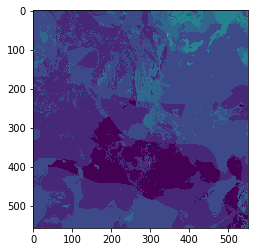

In [63]:
test = fits.getdata('decomposition/gpy_maps/smc_HI_cube_askap_sub_56_g+_fit_fin_component_map_SMC.fits')
plt.imshow(test)

In [65]:
make_dummy_maps('_g+_fit_fin_CNM_map_12_MW.fits')
make_dummy_maps('_g+_fit_fin_CNM_map_12_SMC.fits')

make_dummy_maps('_g+_fit_fin_CNM_map_7_MW.fits')
make_dummy_maps('_g+_fit_fin_CNM_map_7_SMC.fits')

make_dummy_maps('_g+_fit_fin_NHI_map_MW.fits')
make_dummy_maps('_g+_fit_fin_NHI_map_SMC.fits')

make_dummy_maps('_g+_fit_fin_component_map_SMC.fits')
make_dummy_maps('_g+_fit_fin_component_map_MW.fits')

make_dummy_maps('_g+_rchi2_map.fits')

In [67]:
components = [
    "decomposition/temp_maps/smc_HI_cube_askap_sub_" + str(i) + "_g+_fit_fin_NHI_map_MW.fits"
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="decomposition/gpy_maps/smc_HI_cube_askap_NHI_MW.fits",
    save=True,
)

components = [
    "decomposition/temp_maps/smc_HI_cube_askap_sub_" + str(i) + "_g+_fit_fin_NHI_map_SMC.fits"
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="decomposition/gpy_maps/smc_HI_cube_askap_NHI_SMC.fits",
    save=True,
)


components = [
    "decomposition/temp_maps/smc_HI_cube_askap_sub_" + str(i) + "_g+_fit_fin_CNM_map_12_MW.fits"
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="decomposition/gpy_maps/smc_HI_cube_askap_CNM_12_MW.fits",
    save=True,
)

components = [
    "decomposition/temp_maps/smc_HI_cube_askap_sub_" + str(i) + "_g+_fit_fin_CNM_map_12_SMC.fits"
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="decomposition/gpy_maps/smc_HI_cube_askap_CNM_12_SMC.fits",
    save=True,
)


components = [
    "decomposition/temp_maps/smc_HI_cube_askap_sub_" + str(i) + "_g+_fit_fin_CNM_map_7_MW.fits"
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="decomposition/gpy_maps/smc_HI_cube_askap_CNM_7_MW.fits",
    save=True,
)

components = [
    "decomposition/temp_maps/smc_HI_cube_askap_sub_" + str(i) + "_g+_fit_fin_CNM_map_7_SMC.fits"
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="decomposition/gpy_maps/smc_HI_cube_askap_CNM_7_SMC.fits",
    save=True,
)

components = [
    "decomposition/temp_maps/smc_HI_cube_askap_sub_" + str(i) + "_g+_fit_fin_component_map_SMC.fits"
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="decomposition/gpy_maps/smc_HI_cube_askap_component_map_SMC.fits",
    save=True,
)

components = [
    "decomposition/temp_maps/smc_HI_cube_askap_sub_" + str(i) + "_g+_fit_fin_component_map_MW.fits"
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="decomposition/gpy_maps/smc_HI_cube_askap_component_map_MW.fits",
    save=True,
)

components = [
    "decomposition/temp_maps/smc_HI_cube_askap_sub_" + str(i) + "_g+_rchi2_map.fits"
    for i in range(64)
]
new_map, new_head = spectral_cube_functions.combine_fields(
    components,
    ncols=8,
    nrows=8,
    path_to_output_file="decomposition/gpy_maps/smc_HI_cube_askap_rchi2_map.fits",
    save=True,
)


SAVED FILE: 'smc_HI_cube_askap_NHI_MW.fits' in 'decomposition/gpy_maps'
SAVED FILE: 'smc_HI_cube_askap_NHI_SMC.fits' in 'decomposition/gpy_maps'
SAVED FILE: 'smc_HI_cube_askap_CNM_12_MW.fits' in 'decomposition/gpy_maps'
SAVED FILE: 'smc_HI_cube_askap_CNM_12_SMC.fits' in 'decomposition/gpy_maps'
SAVED FILE: 'smc_HI_cube_askap_CNM_7_MW.fits' in 'decomposition/gpy_maps'
SAVED FILE: 'smc_HI_cube_askap_CNM_7_SMC.fits' in 'decomposition/gpy_maps'
SAVED FILE: 'smc_HI_cube_askap_component_map_SMC.fits' in 'decomposition/gpy_maps'
SAVED FILE: 'smc_HI_cube_askap_component_map_MW.fits' in 'decomposition/gpy_maps'
SAVED FILE: 'smc_HI_cube_askap_rchi2_map.fits' in 'decomposition/gpy_maps'


In [68]:
nhismc, h_nhismc = fits.getdata("decomposition/gpy_maps/smc_HI_cube_askap_NHI_SMC.fits", header=True)
nhimw, h_nhimw = fits.getdata("decomposition/gpy_maps/smc_HI_cube_askap_NHI_MW.fits", header=True)

nhismc_tot, h_nhismct = fits.getdata("sub_cubes/smc_HI_cube_askap_NHI_SMC.fits", header=True)
nhimw_tot, h_nhimwt = fits.getdata("sub_cubes/smc_HI_cube_askap_NHI_MW.fits", header=True)

fcnmsmc_7, h_nhismc = fits.getdata("decomposition/gpy_maps/smc_HI_cube_askap_CNM_7_SMC.fits", header=True)
fcnmmw_7, h_nhimw = fits.getdata("decomposition/gpy_maps/smc_HI_cube_askap_CNM_7_MW.fits", header=True)

fcnmsmc_12, h_nhismc = fits.getdata("decomposition/gpy_maps/smc_HI_cube_askap_CNM_12_SMC.fits", header=True)
fcnmmw_12, h_nhimw = fits.getdata("decomposition/gpy_maps/smc_HI_cube_askap_CNM_12_MW.fits", header=True)

ncomp_smc, h_comp = fits.getdata("decomposition/gpy_maps/smc_HI_cube_askap_component_map_SMC.fits", header=True)
ncomp_mw, h_comp = fits.getdata("decomposition/gpy_maps/smc_HI_cube_askap_component_map_MW.fits", header=True)

rchi2, h_rchi2 = fits.getdata("decomposition/gpy_maps/smc_HI_cube_askap_rchi2_map.fits", header=True)

fcnmsmc_12[fcnmsmc_12 == -99.] = np.nan
fcnmsmc_7[fcnmsmc_7 == -99.] = np.nan
fcnmmw_12[fcnmmw_12 == -99.] = np.nan
fcnmmw_7[fcnmmw_7 == -99.] = np.nan

nhismc[nhismc == -99.] = np.nan
nhimw[nhimw == -99.] = np.nan
nhismc_tot[nhismc_tot == -99.] = np.nan
nhimw_tot[nhimw_tot == -99.] = np.nan

ncomp_smc[ncomp_smc == -99.] = np.nan
ncomp_mw[ncomp_mw == -99.] = np.nan

rchi2[rchi2 == -99.] = np.nan


In [69]:
cmap_fcnm = mpl.cm.get_cmap('Blues')
cmap_fcnm.set_bad('grey', 0.5)

cmap_nhi = mpl.cm.get_cmap('magma')
cmap_nhi.set_bad('grey', 0.5)

cmap_ncomp = mpl.cm.get_cmap('viridis')
cmap_ncomp.set_bad('grey', 0.5)

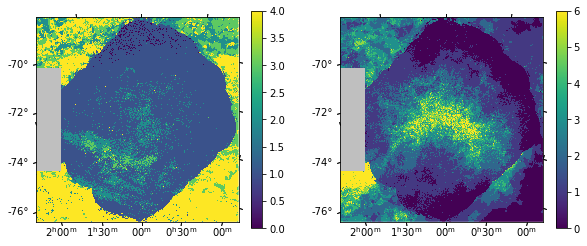

In [75]:
fig = plt.figure(0,[10,4])
ax = fig.add_subplot(121, projection=WCS(h_nhismc))
ax2 = fig.add_subplot(122, projection=WCS(h_nhismc))

im = ax.imshow(ncomp_mw, origin='lower', cmap=cmap_ncomp, vmax=4) #, vmax=400, cmap=cmap_nhi)
im2 = ax2.imshow(ncomp_smc, origin='lower', cmap=cmap_ncomp, vmax=6)  #, vmax=2200, cmap=cmap_nhi)

plt.colorbar(im, ax=ax)
plt.colorbar(im2, ax=ax2)

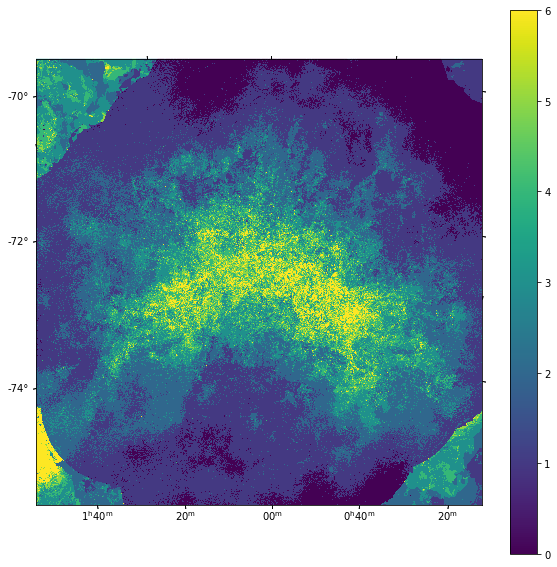

In [81]:
fig = plt.figure(0,[10,10])
ax = fig.add_subplot(111, projection=WCS(h_nhismc))

im = ax.imshow(ncomp_smc, origin='lower', cmap=cmap_ncomp, vmax=6)  #, vmax=2200, cmap=cmap_nhi)
ax.set_xlim(600,3800)
ax.set_ylim(600,3800)
plt.colorbar(im, ax=ax)

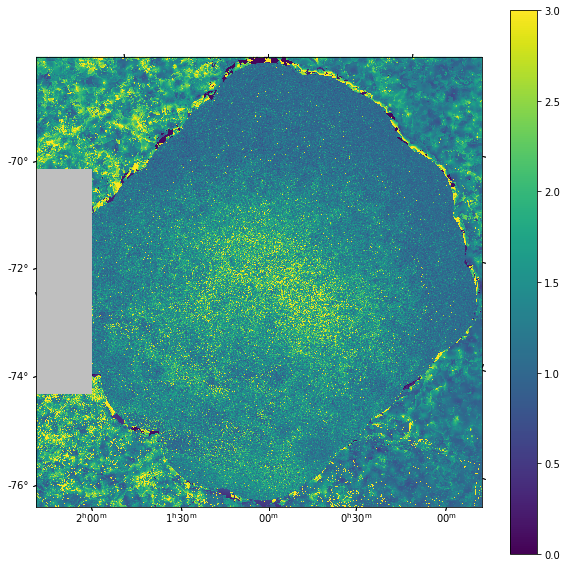

In [52]:
fig = plt.figure(0,[10,10])
ax = fig.add_subplot(111, projection=WCS(h_nhismc))

im = ax.imshow(rchi2, origin='lower', cmap=cmap_ncomp, vmax=3, vmin=0) #, vmax=2200, cmap=cmap_nhi)
plt.colorbar(im, ax=ax)

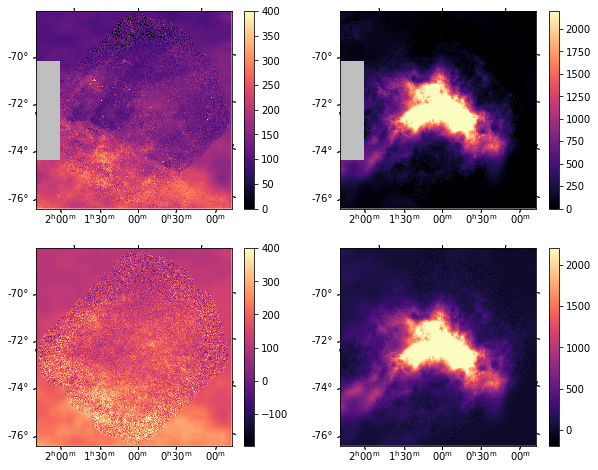

In [53]:
fig = plt.figure(0,[10,8])
ax = fig.add_subplot(221, projection=WCS(h_nhismc))
ax2 = fig.add_subplot(222, projection=WCS(h_nhismc))

ax3 = fig.add_subplot(223, projection=WCS(h_nhismc))
ax4 = fig.add_subplot(224, projection=WCS(h_nhismc))
                     
im = ax.imshow(nhimw, origin='lower', vmax=400, cmap=cmap_nhi)
im2 = ax2.imshow(nhismc, origin='lower', vmax=2200, cmap=cmap_nhi)

im3 = ax3.imshow(nhimw_tot, origin='lower', vmax=400, cmap=cmap_nhi)
im4 = ax4.imshow(nhismc_tot, origin='lower', vmax=2200, cmap=cmap_nhi)

plt.colorbar(im, ax=ax)
plt.colorbar(im2, ax=ax2)
plt.colorbar(im3, ax=ax3)
plt.colorbar(im4, ax=ax4)

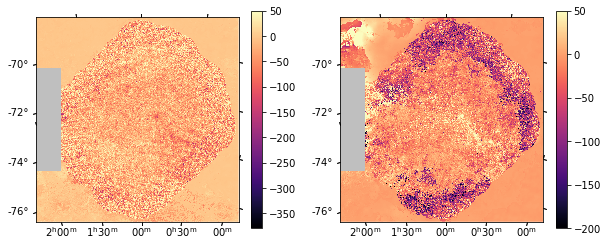

In [54]:
fig = plt.figure(0,[10,4])
ax = fig.add_subplot(121, projection=WCS(h_nhismc))
ax2 = fig.add_subplot(122, projection=WCS(h_nhismc))
                     
im = ax.imshow(nhimw-nhimw_tot, origin='lower', vmax=50, cmap=cmap_nhi) #, vmax=400)
im2 = ax2.imshow(nhismc-nhismc_tot, origin='lower', vmin=-200, vmax = 50, cmap=cmap_nhi) #, vmax=500)

plt.colorbar(im, ax=ax)
plt.colorbar(im2, ax=ax2)

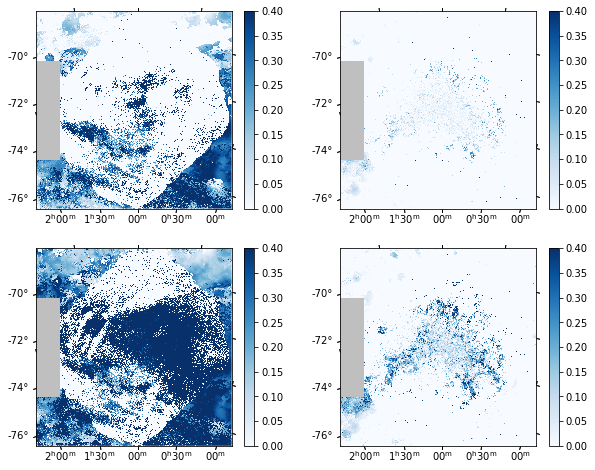

In [24]:
fig = plt.figure(0,[10,8])

ax = fig.add_subplot(221, projection=WCS(h_nhismc))
ax2 = fig.add_subplot(222, projection=WCS(h_nhismc))

ax3 = fig.add_subplot(223, projection=WCS(h_nhismc))
ax4 = fig.add_subplot(224, projection=WCS(h_nhismc))
                   
fcnm_max=0.4
im = ax.imshow(fcnmmw_7, origin='lower',vmax=fcnm_max, vmin=0, cmap=cmap_fcnm) #, vmax=100) #, vmax=400)
im2 = ax2.imshow(fcnmsmc_7, origin='lower', vmax=fcnm_max, vmin=0, cmap=cmap_fcnm) #, vmin=-200, vmax = 200) #, vmax=500)

im3 = ax3.imshow(fcnmmw_12, origin='lower',vmax=fcnm_max, vmin=0, cmap=cmap_fcnm) #, vmax=100) #, vmax=400)
im4 = ax4.imshow(fcnmsmc_12, origin='lower', vmax=fcnm_max, vmin=0, cmap=cmap_fcnm) #, vmin=-200, vmax = 200) #, vmax=500)

plt.colorbar(im, ax=ax)
plt.colorbar(im2, ax=ax2)
plt.colorbar(im3, ax=ax3)
plt.colorbar(im4, ax=ax4)

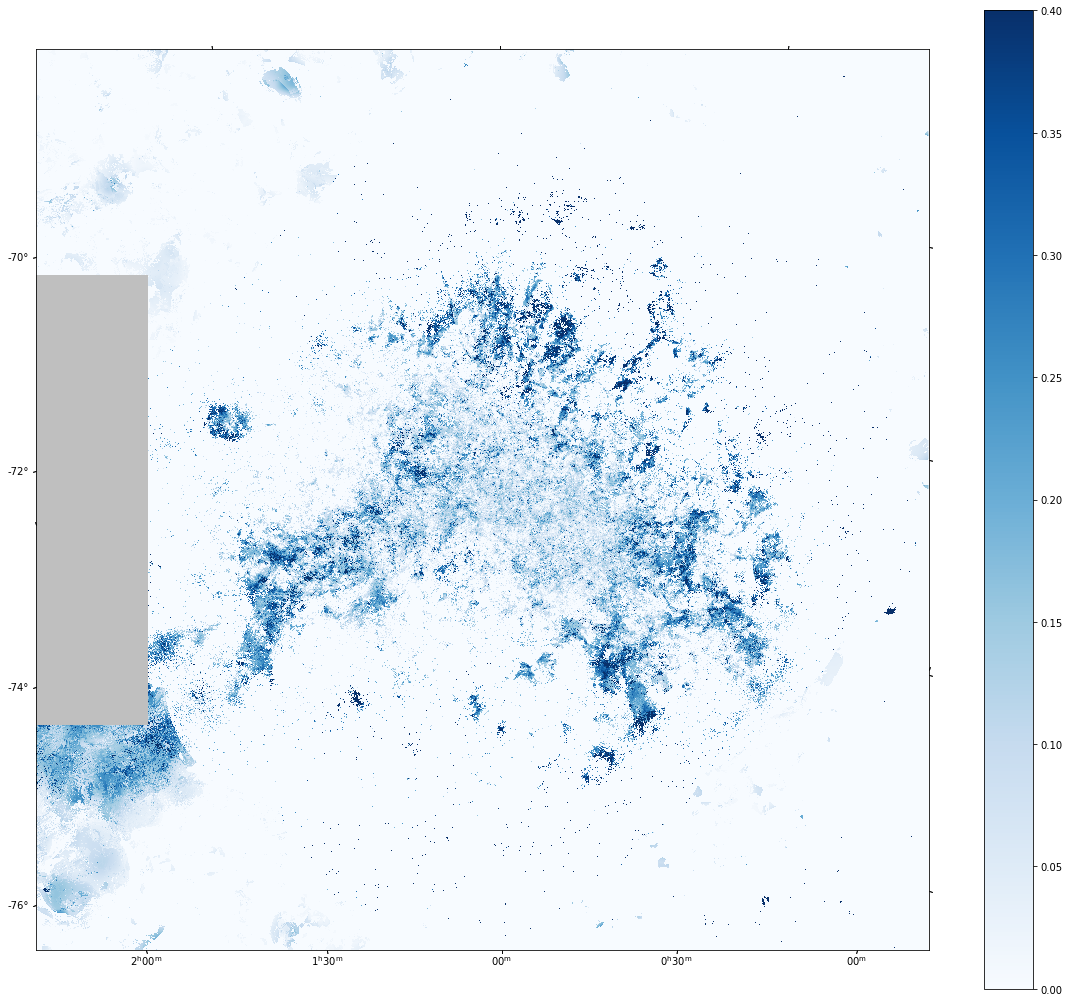

In [82]:
fig = plt.figure(0,[20,18])

ax = fig.add_subplot(111, projection=WCS(h_nhismc))


im = ax.imshow(fcnmsmc_12, origin='lower', vmax=0.4, vmin=0, cmap=cmap_fcnm) #, vmin=-200, vmax = 200) #, vmax=500)
plt.colorbar(im, ax=ax)

In [26]:
cube, header = fits.getdata('smc_HI_cube_askap.fits',header=True)
vel = make_velocity_axis(header)